# MACHINE LEARNING: BÀI THỰC HÀNH SỐ 5

## MÔ HÌNH ANN (MULTI LAYER CLASSIFIER), CNN VÀ ỨNG DỤNG PCA

In [43]:
# import the necessary libraries
from __future__ import division, print_function, unicode_literals
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import sparse
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA

import cv2

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Ví dụ 1

In [44]:
N = 100 # number of points per class
d = 2 # dimensionality
C = 3 # number of classes
X = np.zeros((d, N*C)) # data matrix (each row = single example)
y = np.zeros(N*C, dtype='uint8') # class labels

for j in range(C):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[:,ix] = np.c_[r*np.sin(t), r*np.cos(t)].T
  y[ix] = j

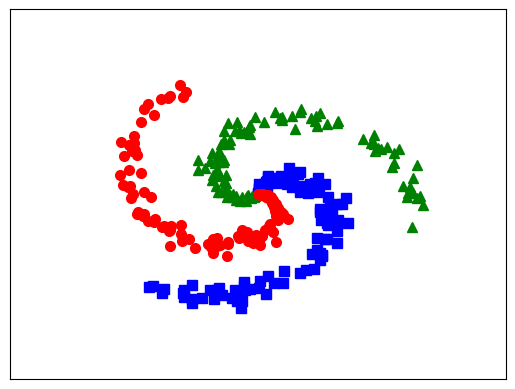

In [45]:
# lets visualize the data:
plt.plot(X[0, :N], X[1, :N], 'bs', markersize = 7);
plt.plot(X[0, N:2*N], X[1, N:2*N], 'g^', markersize = 7);
plt.plot(X[0, 2*N:], X[1, 2*N:], 'ro', markersize = 7);

plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.show()

In [46]:
def softmax(V):
    e_V = np.exp(V - np.max(V, axis = 0, keepdims = True))
    Z = e_V / e_V.sum(axis = 0)
    return Z

In [47]:
# cost or loss function
def cost(Y, Yhat):
    return -np.sum(Y*np.log(Yhat))/Y.shape[1]

In [48]:
## One-hot coding
def convert_labels(y, C = 3):
    Y = sparse.coo_matrix((np.ones_like(y),
        (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y

In [49]:
d0 = 2
d1 = h = 100 # size of hidden layer
d2 = C = 3
# initialize parameters randomly
W1 = 0.01*np.random.randn(d0, d1)
b1 = np.zeros((d1, 1))
W2 = 0.01*np.random.randn(d1, d2)
b2 = np.zeros((d2, 1))

Y = convert_labels(y, C)
N = X.shape[1]
eta = 1 # learning rate

In [30]:
for i in range(10000):
    ## Feedforward
    Z1 = np.dot(W1.T, X) + b1
    A1 = np.maximum(Z1, 0)
    Z2 = np.dot(W2.T, A1) + b2
    Yhat = softmax(Z2)

    # print loss after each 1000 iterations
    if i %1000 == 0:
        # compute the loss: average cross-entropy loss
        loss = cost(Y, Yhat)
        print("iter %d, loss: %f" %(i, loss))

    # backpropagation
    E2 = (Yhat - Y )/N
    dW2 = np.dot(A1, E2.T)
    db2 = np.sum(E2, axis = 1, keepdims = True)
    E1 = np.dot(W2, E2)
    E1[Z1 <= 0] = 0 # gradient of ReLU
    dW1 = np.dot(X, E1.T)
    db1 = np.sum(E1, axis = 1, keepdims = True)

    # Gradient Descent update
    W1 += -eta*dW1
    b1 += -eta*db1
    W2 += -eta*dW2
    b2 += -eta*db2

iter 0, loss: 1.098779
iter 1000, loss: 0.124046
iter 2000, loss: 0.055655
iter 3000, loss: 0.039242
iter 4000, loss: 0.031902
iter 5000, loss: 0.027551
iter 6000, loss: 0.024734
iter 7000, loss: 0.022861
iter 8000, loss: 0.021465
iter 9000, loss: 0.020356


In [31]:
Z1 = np.dot(W1.T, X) + b1
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
predicted_class = np.argmax(Z2, axis=0)
acc = 100*np.mean(predicted_class == y)
print('training accuracy: %.2f %%' % (acc))

training accuracy: 99.33 %


(1, 14400)
100


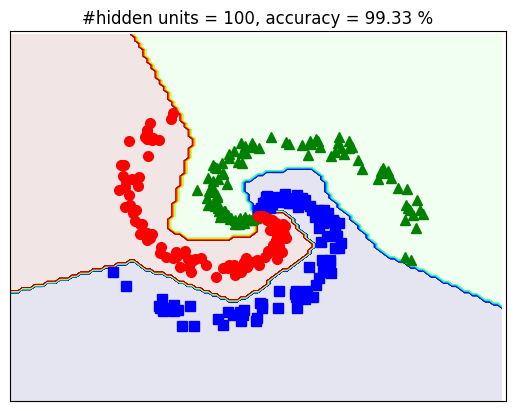

In [32]:
# Visualize results

xm = np.arange(-1.5, 1.5, 0.025)
xlen = len(xm)
ym = np.arange(-1.5, 1.5, 0.025)
ylen = len(ym)
xx, yy = np.meshgrid(xm, ym)


# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# xx.ravel(), yy.ravel()

print(np.ones((1, xx.size)).shape)
xx1 = xx.ravel().reshape(1, xx.size)
yy1 = yy.ravel().reshape(1, yy.size)

# print(xx.shape, yy.shape)
# XX = np.concatenate((np.ones((1, xx.size)), xx1, yy1), axis = 0)

X0 = np.vstack((xx1, yy1))

# print(X.shape)

Z1 = np.dot(W1.T, X0) + b1
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
# predicted class
Z = np.argmax(Z2, axis=0)

Z = Z.reshape(xx.shape)
CS = plt.contourf(xx, yy, Z, 200, cmap='jet', alpha = .1)

# Plot also the training points
# plt.scatter(X[:, 1], X[:, 2], c=Y, edgecolors='k', cmap=plt.cm.Paired)
# plt.xlabel('Sepal length')
# plt.ylabel('Sepal width')

# X = X.T
N = 100
print(N)


plt.plot(X[0, :N], X[1, :N], 'bs', markersize = 7);
plt.plot(X[0, N:2*N], X[1, N:2*N], 'g^', markersize = 7);
plt.plot(X[0, 2*N:], X[1, 2*N:], 'ro', markersize = 7);
# plt.axis('off')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.xticks(())
plt.yticks(())
plt.title('#hidden units = %d, accuracy = %.2f %%' %(d1, acc))
# plt.axis('equal')
# display(X[1:, :], original_label)
fn = 'ex_res'+ str(d1) + '.png'
# plt.savefig(fn, bbox_inches='tight', dpi = 600)
plt.show()

### Ví dụ 2

a. Giảm số chiều dữ liệu xuống còn 100 chiều (từ 28x28 = 784 chiều ban đầu) với tập dữ liệu 5000 ảnh bất kỳ.

In [33]:
# set names to the paths because they're too long
data_path = '/content/drive/MyDrive/handwritting/'
# train path
train_images_path = data_path + 'train-images-idx3-ubyte.gz'
train_labels_path = data_path + 'train-labels-idx1-ubyte.gz'
# test path
test_images_path = data_path + 't10k-images-idx3-ubyte.gz'
test_labels_path = data_path + 't10k-labels-idx1-ubyte.gz'

def get_mnist_data(images_path,
                   labels_path,
                   num_images,
                   shuffle=False,
                   _is=True,
                   image_size=28):
    """
        This shuffle param is active when .gz is downloaded at:
            - 'http://yann.lecun.com/exdb/mnist/'
            - This function return random num_images in 60000 or 10000
    """
    # read data
    import gzip  # to decompress gz (zip) file

    # open file training to read training data
    f_images = gzip.open(images_path, 'r')

    # skip 16 first bytes because these are not data, only header infor
    f_images.read(16)

    # general: read num_images data samples if this parameter is set;
    # if not, read all (60000 training or 10000 test)
    real_num = num_images if not shuffle else (60000 if _is else 10000)

    # read all data to buf_images (28x28xreal_num)
    buf_images = f_images.read(image_size * image_size * real_num)

    # images
    images = np.frombuffer(buf_images, dtype=np.uint8).astype(np.float32)
    images = images.reshape(real_num, image_size, image_size)

    # Read labels
    f_labels = gzip.open(labels_path, 'r')
    f_labels.read(8)

    labels = np.zeros((real_num)).astype(np.int64)

    # rearrange to correspond the images and labels
    for i in range(0, real_num):
        buf_labels = f_labels.read(1)
        labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)

    # shuffle to get random images data
    if shuffle is True:
        rand_id = np.random.randint(real_num, size=num_images)

        images = images[rand_id, :]
        labels = labels[rand_id, ]

    # change images data to type of vector 28x28 dimentional
    images = images.reshape(num_images, image_size * image_size)
    return images, labels

images, labels = get_mnist_data(train_images_path,
                                            train_labels_path,
                                            5000,
                                            shuffle=True)

<ipython-input-33-5eead145b26c>:50: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)


In [34]:
pca = PCA(n_components=100)
result = pca.fit_transform(images)

b. Áp dụng các phương pháp phân loại nhiều lớp: Multinomial Logistic Regression và ANN (đã có code) để phân loại, tỷ lệ train:test là 0.7:0.3.

In [35]:
X_train, X_test, y_train, y_test = train_test_split(result, labels, train_size=0.7, random_state=42)

model = LogisticRegression(multi_class='multinomial', solver='sag', max_iter=10000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.8473333333333334


In [36]:
clf = MLPClassifier(random_state=42)
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.832


### Ví dụ 3

a. Giảm số chiều dữ liệu xuống còn 500.

165 77760 243 320


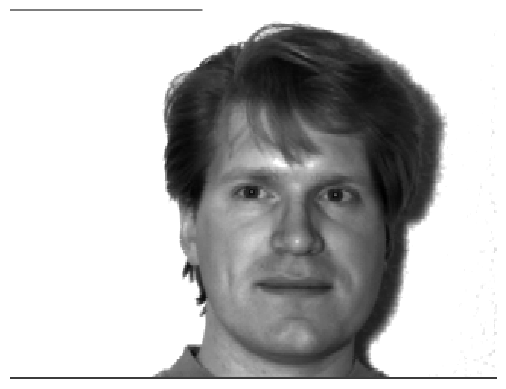

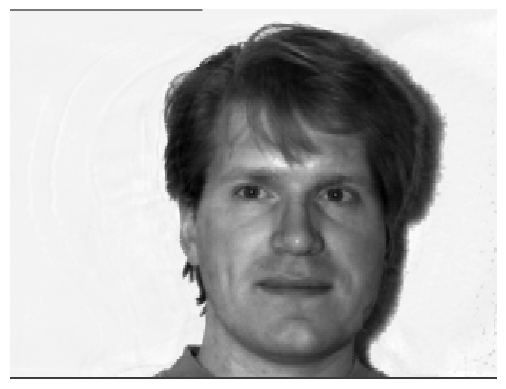

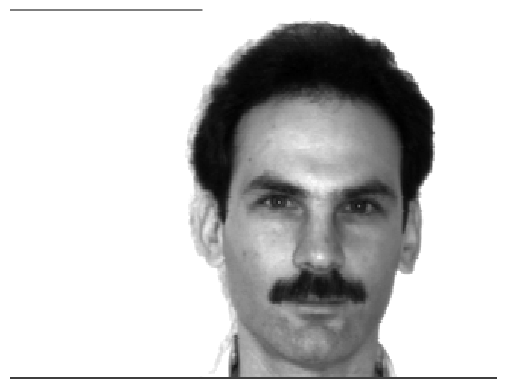

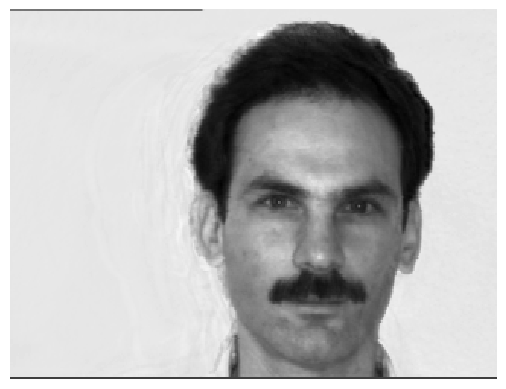

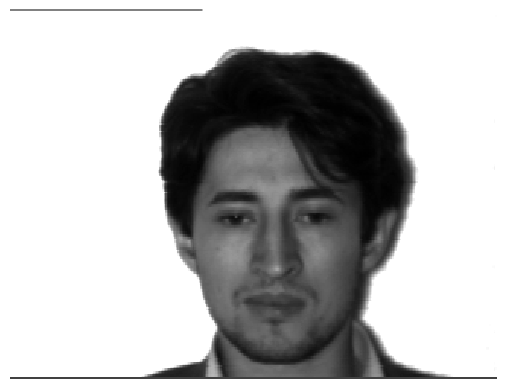

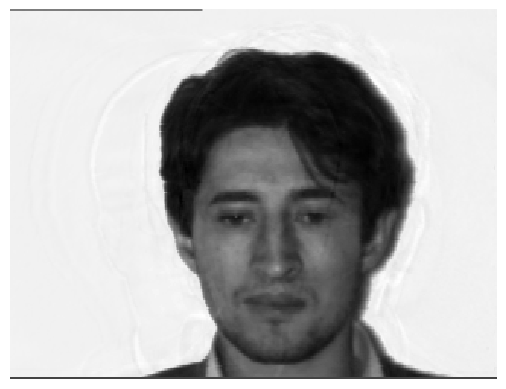

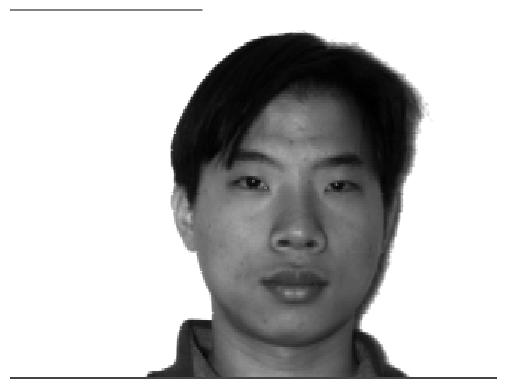

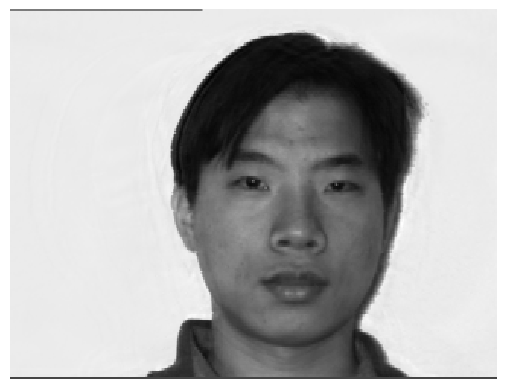

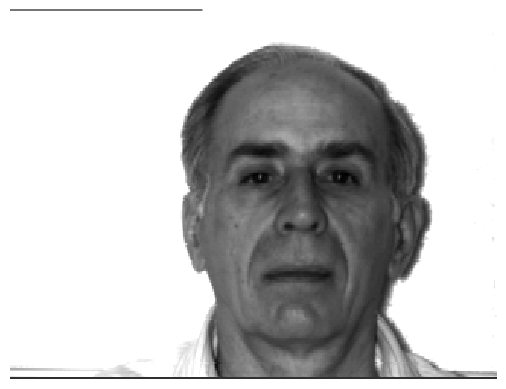

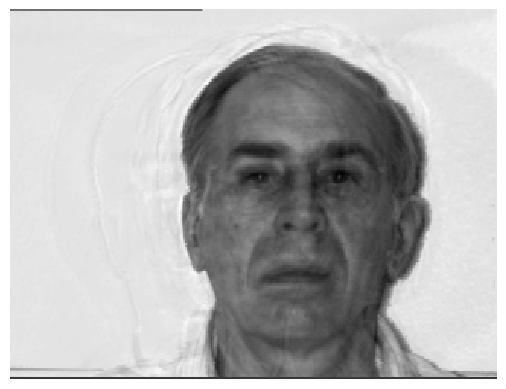

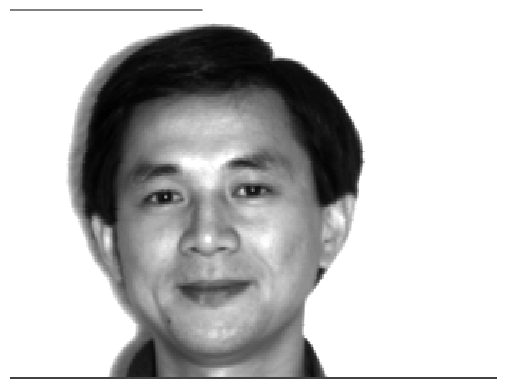

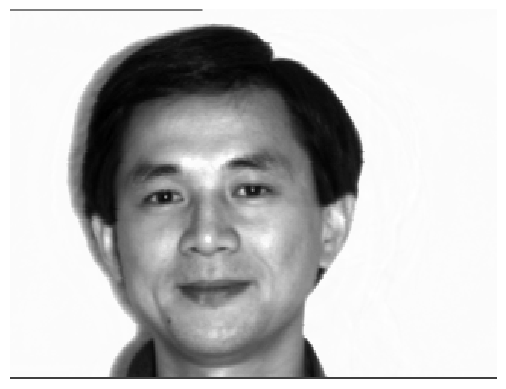

In [37]:
# path to the database - change it if needed
path = '/content/drive/MyDrive/face_data/'

ids = range(1, 16) # 15 people
states = ['centerlight', 'glasses', 'happy', 'leftlight',
          'noglasses', 'normal', 'rightlight','sad',
          'sleepy', 'surprised', 'wink' ]
prefix = 'subject'
suffix = '.png' #file extension is png

# open one picture to get the image's size
fn = prefix + '01.' + states[0] + suffix
im = cv2.imread(path + fn, 0)

h = im.shape[0] # hight
w = im.shape[1] # width

D = h * w
N = len(states)*15
print(N, D, h, w)

X = np.zeros((D, N))
y = []

# collect all data
cnt = 0

# there are 15 people
for person_id in range(1, 16):
    for state in states:

        # get name of each image file
        fn = path + prefix + str(person_id).zfill(2) + '.' + state + suffix

        # open the file and read as grey image
        tmp = cv2.imread(fn, cv2.IMREAD_GRAYSCALE)

        # then add image to dataset X
        X[:, cnt] = tmp.reshape(D)
        y.append(state)
        cnt += 1

# Doing PCA, note that each row is a datapoint

# remain dim. k = 125 - change it!
pca = PCA(n_components=125)

# then apply to data X
pca.fit(X.T)

# then build projection matrix
U = pca.components_.T

# then reshape new dataset (reduced dim.) to be new images and save
# path to save reduced dim. images
path_save = '/content/drive/MyDrive/results/'
for i in range(U.shape[1]):
    plt.axis('off')
    f1 = plt.imshow(U[:, i].reshape(h, w), interpolation='nearest')
    f1.axes.get_xaxis().set_visible(False)
    f1.axes.get_yaxis().set_visible(False)

    plt.gray()
    fn = path_save + 'eigenface' + str(i).zfill(2) + '.png'
    plt.savefig(fn, bbox_inches='tight', pad_inches=0)

# test results by showing some images
# See reconstruction of first 6 persons
for person_id in range(1, 7):
    for state in ['centerlight']:
        fn = path + prefix + str(person_id).zfill(2) + '.' + state + suffix
        im = cv2.imread(fn,0)
        plt.axis('off')

        f1 = plt.imshow(im, interpolation='nearest')
        f1.axes.get_xaxis().set_visible(False)
        f1.axes.get_yaxis().set_visible(False)
        plt.gray()
        plt.show()

        # reshape and subtract mean, don't forget
        x = im.reshape(D, 1) - pca.mean_.reshape(D, 1)

        # encode
        z = U.T.dot(x)

        #decode
        x_tilde = U.dot(z) + pca.mean_.reshape(D, 1)

        # reshape to orginal dim
        im_tilde = x_tilde.reshape(h, w)
        plt.axis('off')

        f1 = plt.imshow(im_tilde, interpolation='nearest')
        f1.axes.get_xaxis().set_visible(False)
        f1.axes.get_yaxis().set_visible(False)
        plt.gray()
#        fn = 'res' + str(person_id).zfill(2) + '.png'
#        plt.savefig(fn, bbox_inches='tight', pad_inches=0)
        plt.show()

d. Áp dụng các phương pháp phân loại nhiều lớp: Multinomial Logistic Regression và ANN (đã có code) để phân loại, tỷ lệ train:test là 0.7:0.3

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X.T, y, test_size=0.3, random_state=42)

In [39]:
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000, random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000, multi_class='multinomial', random_state=42)

In [40]:
y_pred = logreg.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.14


In [41]:
clf = MLPClassifier(random_state=42)
clf.fit(X_train, y_train)

MLPClassifier(random_state=42)

In [42]:
y_pred = clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.08


## Ví dụ 4

a) Giảm chiều dữ liệu và trực quan hóa:

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Đọc dữ liệu
data = pd.read_csv("/content/drive/MyDrive/Dry_Bean_Dataset.csv")

# Tách thuộc tính và nhãn
X = data.drop("Class", axis=1)
y = data["Class"]

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA giảm xuống 2 chiều
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_scaled)

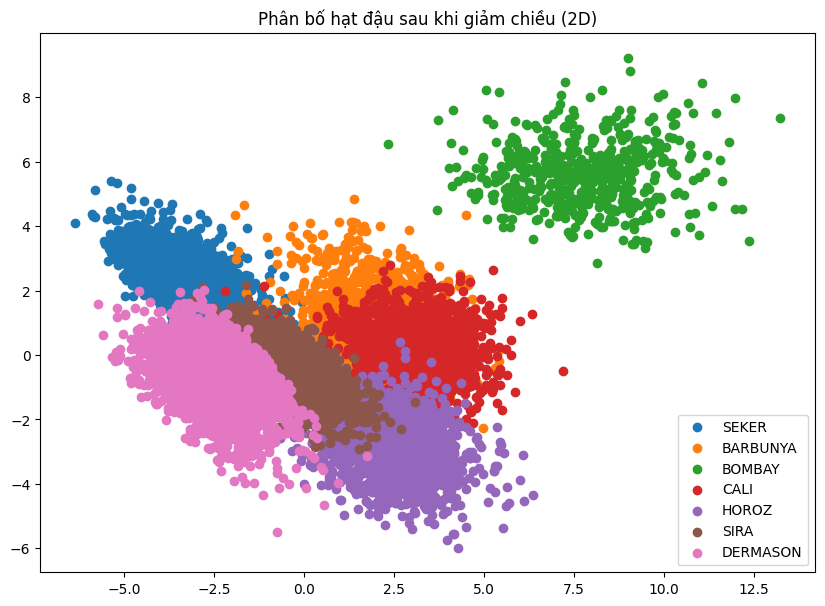

In [61]:
# Trực quan hóa với scatter plot
plt.figure(figsize=(10, 7))
for i, class_name in enumerate(data["Class"].unique()):
    plt.scatter(X_2d[y == class_name, 0], X_2d[y == class_name, 1], label=class_name)
plt.legend()
plt.title("Phân bố hạt đậu sau khi giảm chiều (2D)")
plt.show()

b) Phân loại với Naive Bayes, Logistic Regression và ANN:


In [62]:
# Chia dữ liệu train/validation
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [63]:
# 1. Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred_train = nb_model.predict(X_train)
nb_pred_valid = nb_model.predict(X_valid)

print("Naive Bayes (Train):\n", classification_report(y_train, nb_pred_train))
print("Naive Bayes (Validation):\n", classification_report(y_valid, nb_pred_valid))

Naive Bayes (Train):
               precision    recall  f1-score   support

    BARBUNYA       0.87      0.81      0.84       927
      BOMBAY       0.99      1.00      0.99       361
        CALI       0.87      0.90      0.88      1151
    DERMASON       0.93      0.88      0.90      2503
       HOROZ       0.94      0.95      0.95      1340
       SEKER       0.93      0.94      0.94      1408
        SIRA       0.81      0.86      0.84      1837

    accuracy                           0.90      9527
   macro avg       0.90      0.91      0.91      9527
weighted avg       0.90      0.90      0.90      9527

Naive Bayes (Validation):
               precision    recall  f1-score   support

    BARBUNYA       0.85      0.81      0.83       395
      BOMBAY       1.00      1.00      1.00       161
        CALI       0.87      0.89      0.88       479
    DERMASON       0.93      0.87      0.90      1043
       HOROZ       0.96      0.96      0.96       588
       SEKER       0.93      

In [64]:
# 2. Logistic Regression
lr_model = LogisticRegression(multi_class="multinomial", solver="lbfgs")
lr_model.fit(X_train, y_train)
lr_pred_train = lr_model.predict(X_train)
lr_pred_valid = lr_model.predict(X_valid)

print("Logistic Regression (Train):\n", classification_report(y_train, lr_pred_train))
print("Logistic Regression (Validation):\n", classification_report(y_valid, lr_pred_valid))
# In hệ số để hiểu ý nghĩa
print("LR Coefficients:\n", lr_model.coef_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression (Train):
               precision    recall  f1-score   support

    BARBUNYA       0.95      0.91      0.93       927
      BOMBAY       1.00      1.00      1.00       361
        CALI       0.94      0.95      0.94      1151
    DERMASON       0.92      0.92      0.92      2503
       HOROZ       0.96      0.95      0.96      1340
       SEKER       0.95      0.95      0.95      1408
        SIRA       0.86      0.87      0.86      1837

    accuracy                           0.93      9527
   macro avg       0.94      0.94      0.94      9527
weighted avg       0.93      0.93      0.93      9527

Logistic Regression (Validation):
               precision    recall  f1-score   support

    BARBUNYA       0.92      0.91      0.91       395
      BOMBAY       1.00      1.00      1.00       161
        CALI       0.94      0.93      0.93       479
    DERMASON       0.93      0.90      0.92      1043
       HOROZ       0.97      0.95      0.96       588
       SEKER 

In [65]:
# 3. ANN (1 tầng ẩn, 32 neuron)
ann_model = MLPClassifier(hidden_layer_sizes=(32,), max_iter=500)
ann_model.fit(X_train, y_train)
ann_pred_train = ann_model.predict(X_train)
ann_pred_valid = ann_model.predict(X_valid)

print("ANN (Train):\n", classification_report(y_train, ann_pred_train))
print("ANN (Validation):\n", classification_report(y_valid, ann_pred_valid))

ANN (Train):
               precision    recall  f1-score   support

    BARBUNYA       0.95      0.93      0.94       927
      BOMBAY       1.00      1.00      1.00       361
        CALI       0.94      0.95      0.95      1151
    DERMASON       0.92      0.93      0.93      2503
       HOROZ       0.97      0.95      0.96      1340
       SEKER       0.97      0.95      0.96      1408
        SIRA       0.87      0.88      0.88      1837

    accuracy                           0.93      9527
   macro avg       0.95      0.94      0.94      9527
weighted avg       0.93      0.93      0.93      9527

ANN (Validation):
               precision    recall  f1-score   support

    BARBUNYA       0.92      0.94      0.93       395
      BOMBAY       1.00      1.00      1.00       161
        CALI       0.94      0.94      0.94       479
    DERMASON       0.93      0.93      0.93      1043
       HOROZ       0.98      0.95      0.96       588
       SEKER       0.96      0.94      0.95  

c) Giảm dữ liệu xuống còn 04 chiều, sau đó thực hiện lại tất cả các công việc trong ý (b).

In [66]:
# PCA giảm xuống 4 chiều
pca = PCA(n_components=4)
X_2d = pca.fit_transform(X_scaled)

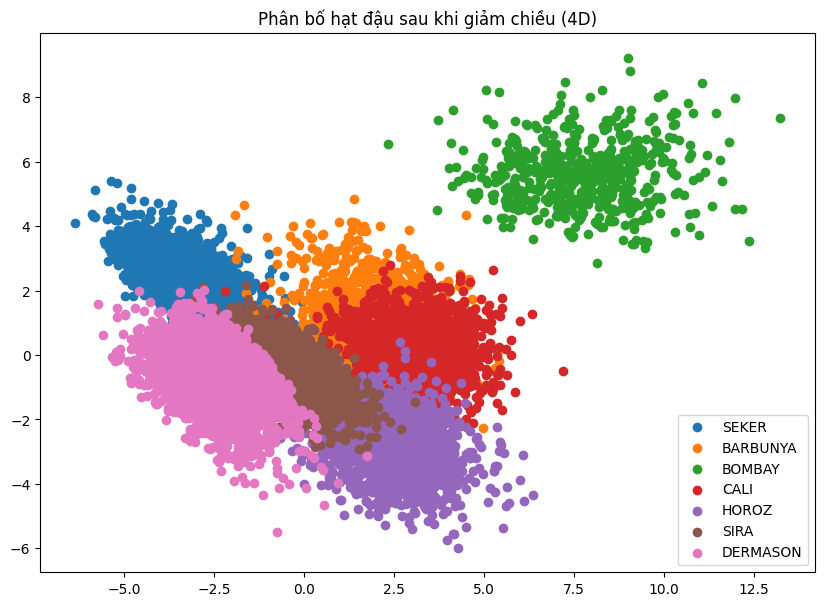

In [71]:
# Trực quan hóa với scatter plot
plt.figure(figsize=(10, 7))
for i, class_name in enumerate(data["Class"].unique()):
    plt.scatter(X_2d[y == class_name, 0], X_2d[y == class_name, 1], label=class_name)
plt.legend()
plt.title("Phân bố hạt đậu sau khi giảm chiều (4D)")
plt.show()

In [68]:
# 1. Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred_train = nb_model.predict(X_train)
nb_pred_valid = nb_model.predict(X_valid)

print("Naive Bayes (Train):\n", classification_report(y_train, nb_pred_train))
print("Naive Bayes (Validation):\n", classification_report(y_valid, nb_pred_valid))

Naive Bayes (Train):
               precision    recall  f1-score   support

    BARBUNYA       0.87      0.81      0.84       927
      BOMBAY       0.99      1.00      0.99       361
        CALI       0.87      0.90      0.88      1151
    DERMASON       0.93      0.88      0.90      2503
       HOROZ       0.94      0.95      0.95      1340
       SEKER       0.93      0.94      0.94      1408
        SIRA       0.81      0.86      0.84      1837

    accuracy                           0.90      9527
   macro avg       0.90      0.91      0.91      9527
weighted avg       0.90      0.90      0.90      9527

Naive Bayes (Validation):
               precision    recall  f1-score   support

    BARBUNYA       0.85      0.81      0.83       395
      BOMBAY       1.00      1.00      1.00       161
        CALI       0.87      0.89      0.88       479
    DERMASON       0.93      0.87      0.90      1043
       HOROZ       0.96      0.96      0.96       588
       SEKER       0.93      

In [69]:
# 2. Logistic Regression
lr_model = LogisticRegression(multi_class="multinomial", solver="lbfgs")
lr_model.fit(X_train, y_train)
lr_pred_train = lr_model.predict(X_train)
lr_pred_valid = lr_model.predict(X_valid)

print("Logistic Regression (Train):\n", classification_report(y_train, lr_pred_train))
print("Logistic Regression (Validation):\n", classification_report(y_valid, lr_pred_valid))
# In hệ số để hiểu ý nghĩa
print("LR Coefficients:\n", lr_model.coef_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression (Train):
               precision    recall  f1-score   support

    BARBUNYA       0.95      0.91      0.93       927
      BOMBAY       1.00      1.00      1.00       361
        CALI       0.94      0.95      0.94      1151
    DERMASON       0.92      0.92      0.92      2503
       HOROZ       0.96      0.95      0.96      1340
       SEKER       0.95      0.95      0.95      1408
        SIRA       0.86      0.87      0.86      1837

    accuracy                           0.93      9527
   macro avg       0.94      0.94      0.94      9527
weighted avg       0.93      0.93      0.93      9527

Logistic Regression (Validation):
               precision    recall  f1-score   support

    BARBUNYA       0.92      0.91      0.91       395
      BOMBAY       1.00      1.00      1.00       161
        CALI       0.94      0.93      0.93       479
    DERMASON       0.93      0.90      0.92      1043
       HOROZ       0.97      0.95      0.96       588
       SEKER 

In [70]:
# 3. ANN (1 tầng ẩn, 32 neuron)
ann_model = MLPClassifier(hidden_layer_sizes=(32,), max_iter=500)
ann_model.fit(X_train, y_train)
ann_pred_train = ann_model.predict(X_train)
ann_pred_valid = ann_model.predict(X_valid)

print("ANN (Train):\n", classification_report(y_train, ann_pred_train))
print("ANN (Validation):\n", classification_report(y_valid, ann_pred_valid))

ANN (Train):
               precision    recall  f1-score   support

    BARBUNYA       0.97      0.94      0.95       927
      BOMBAY       1.00      1.00      1.00       361
        CALI       0.95      0.96      0.96      1151
    DERMASON       0.92      0.94      0.93      2503
       HOROZ       0.96      0.96      0.96      1340
       SEKER       0.96      0.96      0.96      1408
        SIRA       0.89      0.88      0.88      1837

    accuracy                           0.94      9527
   macro avg       0.95      0.95      0.95      9527
weighted avg       0.94      0.94      0.94      9527

ANN (Validation):
               precision    recall  f1-score   support

    BARBUNYA       0.94      0.94      0.94       395
      BOMBAY       1.00      1.00      1.00       161
        CALI       0.95      0.95      0.95       479
    DERMASON       0.92      0.93      0.93      1043
       HOROZ       0.97      0.96      0.96       588
       SEKER       0.96      0.95      0.96  